In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from scipy import stats

In [2]:
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("test_labels_scoring.csv")

model_scores = {"bidirectional-gru" : [], "bi-lstm-conv" : [], "glove-lstm-dropout" : []}
public_scores = {"bidirectional-gru" : 0.9841, "bi-lstm-conv" : 0.9833, "glove-lstm-dropout" : 0.9771}
submissions = { mn : pd.read_csv("%s_scoring.csv" % mn) for mn in model_scores }

labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [4]:
for i in range(1000):
    df_percent = df.sample(frac=0.25, random_state=i)
    for mn, sub in submissions.iteritems():
        sub_percent = sub.sample(frac=0.25, random_state=i)
        avg = 0.0
        for l in labels:
            avg += sklearn.metrics.roc_auc_score(df_percent[l], sub_percent[l])
        model_scores[mn].append(avg/6.0)

('bi-lstm-conv', 0.9794126162388426, 0.9854862523957206)
('glove-lstm-dropout', 0.9725181433778284, 0.9808982269605807)
('bidirectional-gru', 0.9792738014378953, 0.9858056410155127)


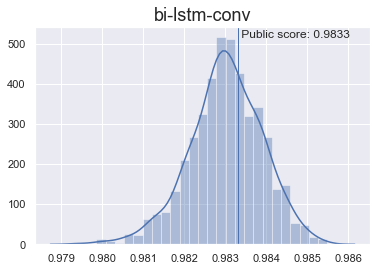

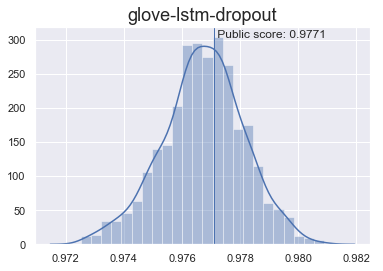

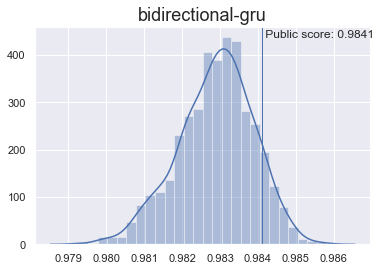

In [34]:
for m, s in model_scores.iteritems():
    fig = plt.figure()
    plt.title(m, fontsize=18)
    ax = sns.distplot(s)
    sns.rugplot([public_scores[m]], height=1.0)
    plt.text(public_scores[m], ax.get_ylim()[1] * 0.95, " Public score: %.4f" % public_scores[m])